# Samurai by the numbers (lvl 1-49)
## by Tzuyu Chou (Cactuar)

### Update log
<ul>
<li> 06/03/2017: Created a parser to convert strings describing action sequences into a rotation dataframe. Pruned some uninteresting analysis. Created new plots for analyzing scaling of AoE rotations with encounter length and group size. Included average potency per GCD calculations. Dataframe structure will allow monitoring of buffs, DoTs, and other statuses over time. Changed text size and added line breaks through Markdown.

<li> 06/02/2017: Finished up to level 49 for now.

<li> 06/01/2017: Up to level 40 rotation.
</ul>

In [110]:
from samurai import *
from plotting import *

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sb
from IPython.display import display
%matplotlib inline

<hr width=75%>

## lvl 1-3

Up to level 3, you only have one weaponskill... so use it.

In [111]:
sam = Samurai()

actions = [('Hakaze'), ('Hakaze'), ('Hakaze'), ('Hakaze'), 
           ('Hakaze'), ('Hakaze'), ('Hakaze'), ('Hakaze')]

In [112]:
df0, average_potency = sam.parse_rotation(actions)
display(df0)
print 'average potency per GCD =', average_potency

,Weaponskill,Ability,Potency,Total Potency
0,Hakaze,,150.0,150.0
1,Hakaze,,150.0,300.0
2,Hakaze,,150.0,450.0
3,Hakaze,,150.0,600.0
4,Hakaze,,150.0,750.0
5,Hakaze,,150.0,900.0
6,Hakaze,,150.0,1050.0
7,Hakaze,,150.0,1200.0


average potency per GCD = 150.0


<hr width=75%>

## lvl 4-17

At level 4, you gain the use of Jinpu, which combos from Hakaze and gives you your damage up buff. You'll definitely want to keep this buff up at all times and it should be simple enough with its 30s duration. The next weaponskill you obtain is Enbi, a ranged attack with a niche use. Level 6 grants you the defensive buff, Third Eye, and level 10 grants you the ability Ageha, an execution ability. Use it whenever available.

In [113]:
sam = Samurai()

actions = [('Hakaze'), ('Jinpu'), ('Hakaze'), ('Jinpu'),
           ('Hakaze'), ('Jinpu'), ('Hakaze'), ('Jinpu')]

In [114]:
df1, average_potency = sam.parse_rotation(actions)
display(df1)
print 'average potency per GCD =', average_potency

,Weaponskill,Ability,Potency,Total Potency
0,Hakaze,,150.0,150.0
1,Jinpu,,280.0,430.0
2,Hakaze,,172.5,602.5
3,Jinpu,,322.0,924.5
4,Hakaze,,172.5,1097.0
5,Jinpu,,322.0,1419.0
6,Hakaze,,172.5,1591.5
7,Jinpu,,322.0,1913.5


average potency per GCD = 239.1875


How does this compare to the previous rotation?

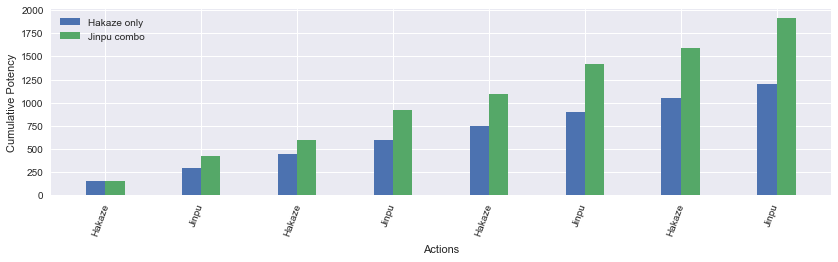

In [115]:
compare_potencies([df0, df1], ['Hakaze only', 'Jinpu combo'])

<hr width=75%>

## lvl 18-29

Level 18 sees the introduction of your haste buff, Shifu. When executed as a combo, Shifu grants you this buff for a duration of 30s in addition to the additional combo potency. At these levels, it's fairly close as to which buff takes priority, Shifu or Jinpu. However, with the introduction of Sen, you will definitely want to prioritize Shifu so that you may open your Sen more often to execute the powerful Iaijutsu more often.

** Note: the haste buff is modeled as a straight potency multiplier (11%) at this time since the discrete time model does not account for the decreased GCD.

In [116]:
sam = Samurai()

actions = [('Hakaze'), ('Shifu'), ('Hakaze'), ('Jinpu'),
           ('Hakaze'), ('Shifu'), ('Hakaze'), ('Jinpu')]

In [117]:
df2, average_potency = sam.parse_rotation(actions)
display(df2)
print 'average potency per GCD =', average_potency

,Weaponskill,Ability,Potency,Total Potency
0,Hakaze,,150.000,150.000
1,Shifu,,280.000,430.000
2,Hakaze,,166.500,596.500
3,Jinpu,,310.800,907.300
4,Hakaze,,191.475,1098.775
5,Shifu,,357.420,1456.195
6,Hakaze,,191.475,1647.670
7,Jinpu,,357.420,2005.090


average potency per GCD = 250.63625


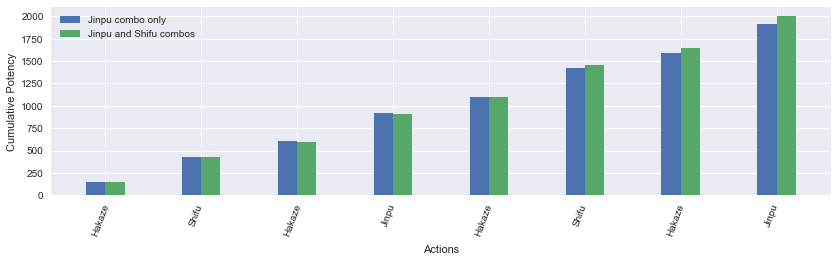

In [118]:
compare_potencies([df1, df2], ['Jinpu combo only', 'Jinpu and Shifu combos'])

** Note: The Shifu buff is modeled as a 11% increase in potency per GCD, chosen arbitrarily. This explains the discrepancy for the first two GCDs. 

<hr width=75%>

Level 26 introduces your first AoE ability, Fuga. At this time, it does not combo to or from anything and deals 100 potency to all targets in a frontal cone.

Napkin math says that Fuga should do more potency per GCD for three or more targets. Should we put our Shifu and Jinpu buffs if they're not up before using Fuga? Depends on how long the encounter is.

### For Fuga with buffs:

In [119]:
dfs_buff = []
avg_buff = []
labels = []

n_target_range = range(2, 8)

for n_targets in n_target_range:
    sam = Samurai()
    
    actions = [('Hakaze'), ('Shifu'), ('Hakaze'), ('Jinpu'),
               ('Fuga'), ('Fuga'), ('Fuga'), ('Fuga'),
               ('Fuga'), ('Fuga'), ('Fuga'), ('Fuga')]
    
    df_temp, average_potency = sam.parse_rotation(actions, n_targets=n_targets)
    dfs_buff.append(df_temp)
    avg_buff.append(average_potency)
    
    labels.append('%s targets' % n_targets)   

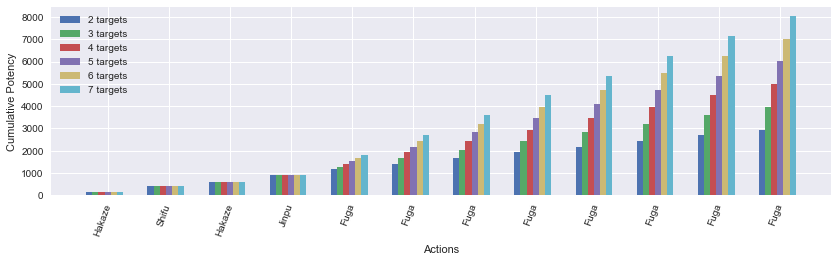

In [120]:
compare_n_potencies(dfs_buff, labels)

### For Fuga with no buffs:

In [121]:
dfs_no_buff = []
avg_no_buff = []
labels = []

for n_targets in n_target_range:
    sam = Samurai()
    
    actions = [('Fuga'), ('Fuga'), ('Fuga'), ('Fuga'),
               ('Fuga'), ('Fuga'), ('Fuga'), ('Fuga'),
               ('Fuga'), ('Fuga'), ('Fuga'), ('Fuga')]
    
    df_temp, average_potency = sam.parse_rotation(actions, n_targets=n_targets)
    dfs_no_buff.append(df_temp)
    avg_no_buff.append(average_potency)
    
    labels.append('%s targets' % n_targets)  

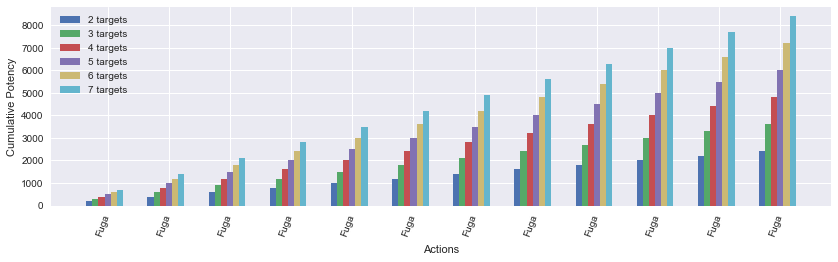

In [122]:
compare_n_potencies(dfs_no_buff, labels)

The potency over four GCDs to put up Shifu and Jinpu is about 977. For $n$ targets, Fuga deals $4*n*100$ potency over that same time frame. The new potency per GCD with the buffs up is about $1.15*1.11*100*n=127.65*n$ potency.

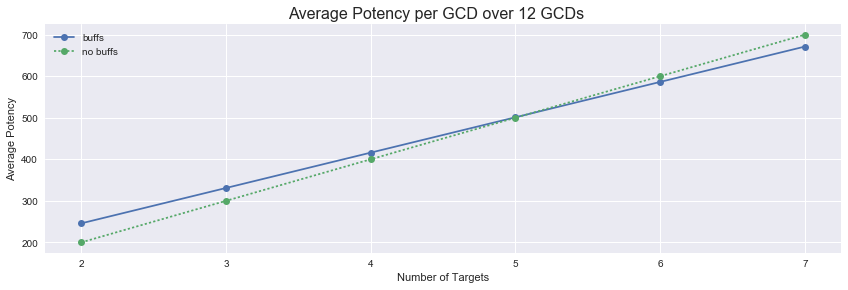

In [123]:
fig, axes = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(12,4))
fig.tight_layout(pad=2)

axes.plot(n_target_range, avg_buff, '-o', label='buffs')
axes.plot(n_target_range, avg_no_buff, ':o', label='no buffs')
axes.set_ylabel('Average Potency')
axes.set_xlabel('Number of Targets')
axes.legend(loc='upper left', framealpha=0.5)

fig.suptitle('Average Potency per GCD over %s GCDs' % len(actions))

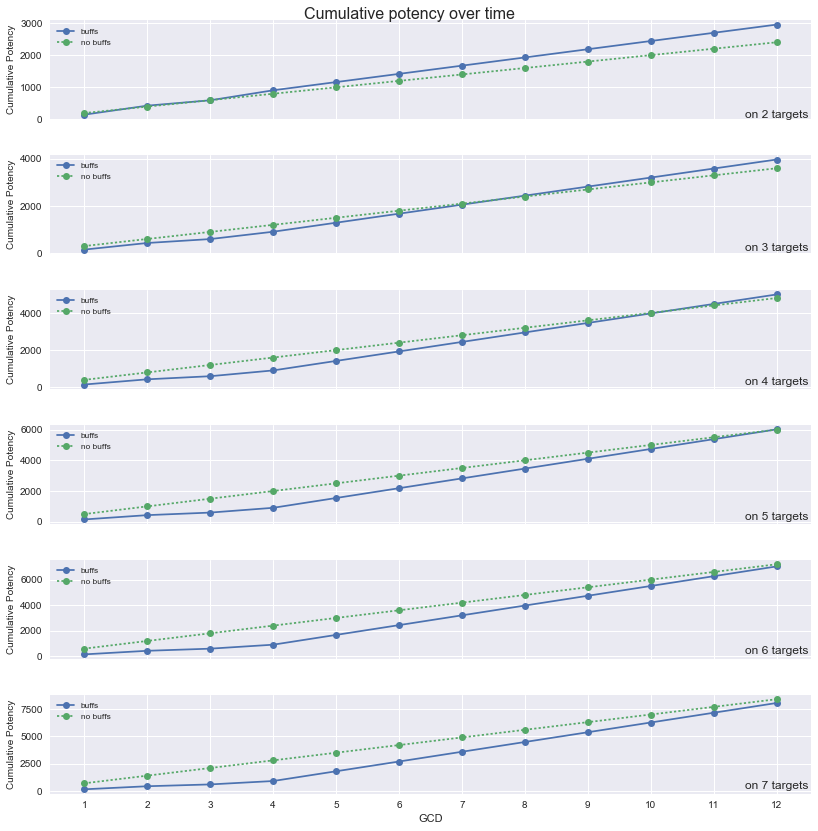

In [124]:
fig, axes = plt.subplots(nrows=len(dfs_buff), ncols=1, sharex=True, figsize=(12,12))
fig.tight_layout(pad=2)

for k, df in enumerate(dfs_buff): 
    ax = axes[k]
    
    xlocs = np.arange(len(dfs_buff[0]))+1
    ax.plot(xlocs, df['Total Potency'], '-o', label='buffs')
    ax.plot(xlocs, dfs_no_buff[k]['Total Potency'], ':o', label='no buffs')

    ax.set_ylabel('Cumulative Potency', fontsize=10)
    axes[-1].set_xlabel('GCD')
    
    axes[-1].set_xticks(xlocs)
    ax.legend(loc='upper left', framealpha=0.5, prop={'size': 'small'})
    
    ax.text(len(dfs_buff[0])+0.5, 0.01, 'on %s targets' % n_target_range[k], ha='right', va='bottom', fontsize=12)

fig.suptitle('Cumulative potency over time')
fig.tight_layout(pad=3)

There are approximately ten GCDs after putting up your first buff, Shifu before you need to refresh it. For small mob counts, the crossover point where putting up buffs before using Fuga is more optimal occurs fairly early on. However, as the number of targets increases, the upfront "cost" of putting the buffs up does not pay off. At these low levels, the pull sizes are likely to be small, so putting up buffs first is probably optimal. Note that at pull size of 3, the average potency of the buffed AoE rotation is higher than the single target rotation. (\~330 > \~250)

### Priority: Shifu > Jinpu. 
### Filler: Either combo to maintain the buffs.

### AoE: Shifu > Jinpu > Fuga for small groups. Fuga only for large groups (>5 or so)

<hr width=75%>

## lvl 30-39

Level 30 sees the introduction of your first Sen through the Gekko combo finisher (combo from Jinpu) and with it your first Iaijutsu, Higanbana. This powerful single-target weaponskill applies a 60s DoT in addition to initial damage for a total of 940 potency over its duration.

In [125]:
sam = Samurai()

actions = [('Hakaze'), ('Shifu'), ('Hakaze'), ('Jinpu'),
           ('Gekko'), ('Higanbana'), ('Hakaze'), ('Jinpu'),
           ('Gekko'), ('Hakaze'), ('Jinpu'), ('Gekko')]

In [126]:
df3, average_potency = sam.parse_rotation(actions)
display(df3)
print 'average potency per GCD =', average_potency

,Weaponskill,Ability,Potency,Total Potency
0,Hakaze,,150.000000,150.000000
1,Shifu,,280.000000,430.000000
2,Hakaze,,166.500000,596.500000
3,Jinpu,,310.800000,907.300000
4,Gekko,,510.600000,1417.900000
5,Higanbana,,306.360000,1724.260000
6,Hakaze,,229.153025,1953.413025
7,Jinpu,,395.098025,2348.511050
8,Gekko,,548.278025,2896.789075
9,Hakaze,,229.153025,3125.942100


average potency per GCD = 339.109845833


** Note: the potency of the DoT is prorated due to the GCD being shorter than the DoT tick period. So Higanbana's initial potency is applied on action and the DoT potency is added to subsequent GCDs. 

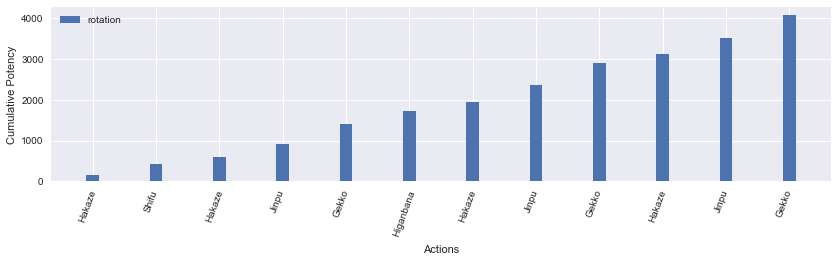

In [127]:
plot_potency(df3)

At this point, the average potency of the Gekko combo is $400+280+150=830/3=~276.66$ before buffs. The average potency of the Shifu combo is $150+280=430/2=215$ before buffs. Therefore, Higanbana is more optimal than the Gekko combo after two DoT ticks. Since it takes approximately 3-4 GCDs to reapply Higanbana (Gekko combo plus cast time of Higanbana), Higanbana will always be optimal to clip in single target situations. Additionally, in small mob groups, applying Higanbana to each target may also be optimal.

In [128]:
sam = Samurai()

actions = [('Hakaze'), ('Shifu'), ('Hakaze'), ('Jinpu'),
           ('Gekko'), ('Higanbana'), ('Hakaze'), ('Jinpu'),
           ('Gekko'), ('Higanbana'), ('Hakaze'), ('Shifu'),
           ('Hakaze'), ('Jinpu'), ('Gekko'), ('Higanbana')]

In [129]:
df3_clip, average_potency = sam.parse_rotation(actions)
display(df3_clip)
print 'average potency per GCD =', average_potency

,Weaponskill,Ability,Potency,Total Potency
0,Hakaze,,150.000000,150.000000
1,Shifu,,280.000000,430.000000
2,Hakaze,,166.500000,596.500000
3,Jinpu,,310.800000,907.300000
4,Gekko,,510.600000,1417.900000
5,Higanbana,,306.360000,1724.260000
6,Hakaze,,229.153025,1953.413025
7,Jinpu,,395.098025,2348.511050
8,Gekko,,548.278025,2896.789075
9,Higanbana,,344.038025,3240.827100


average potency per GCD = 336.352828125


In a multi-target situation, the DoT can be applied to different mobs to avoid clipping. This will increase the DoT potency accumulation following each Higanbana application, leading to a slight increase in net potency. Note the reapplication of Shifu to keep the buff up.

Now let's try applying Higanbana once and not clipping it (e.g., single target situation):

In [130]:
sam = Samurai()

actions = [('Hakaze'), ('Shifu'), ('Hakaze'), ('Jinpu'),
           ('Gekko'), ('Higanbana'), ('Hakaze'), ('Jinpu'),
           ('Gekko'), ('Hakaze'), ('Shifu'), ('Hakaze'),
           ('Jinpu'), ('Gekko'), ('Hakaze'), ('Jinpu')]

In [131]:
df3_noclip, average_potency = sam.parse_rotation(actions)
display(df3_noclip)
print 'average potency per GCD =', average_potency

,Weaponskill,Ability,Potency,Total Potency
0,Hakaze,,150.000000,150.000000
1,Shifu,,280.000000,430.000000
2,Hakaze,,166.500000,596.500000
3,Jinpu,,310.800000,907.300000
4,Gekko,,510.600000,1417.900000
5,Higanbana,,306.360000,1724.260000
6,Hakaze,,229.153025,1953.413025
7,Jinpu,,395.098025,2348.511050
8,Gekko,,548.278025,2896.789075
9,Hakaze,,229.153025,3125.942100


average potency per GCD = 332.363765625


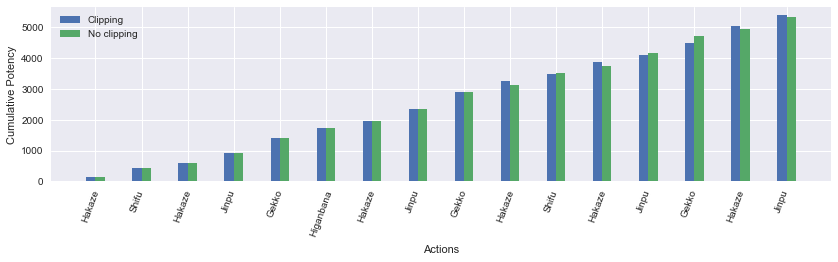

In [132]:
compare_potencies([df3_clip, df3_noclip], ['Clipping', 'No clipping'])

It's fairly close over this time horizon. Regardless if you clip Higanbana or not, it is better than not using Higanbana at all. The bottom line: use your Iaijutsu!

<hr width=75%>

Level 35 introduces an AoE combo with Mangetsu (combo from Fuga). This weaponskill also opens the Getsu Sen. Due to the diminishing AoE scaling, this combo is an average of no less than 100 potency per target over two GCDs. Because Mangetsu opens the Getsu Sen, this allows you to apply Higanbana to individual targets in the group. Depending on group size and encounter duration, this may be optimal. 

In [133]:
dfs_higanbana = []
avg_higanbana = []
labels = []

n_target_range = range(2, 8)

for n_targets in n_target_range:
    sam = Samurai()
    
    actions = [('Fuga'), ('Mangetsu'), ('Higanbana'), ('Fuga'),
               ('Mangetsu'), ('Higanbana'), ('Fuga'), ('Mangetsu'),
               ('Higanbana'), ('Fuga'), ('Mangetsu'), ('Higanbana'),
               ('Fuga'), ('Mangetsu')]
    
    df_temp, average_potency = sam.parse_rotation(actions, n_targets=n_targets)
    dfs_higanbana.append(df_temp)
    avg_higanbana.append(average_potency)
    
    labels.append('%s targets' % n_targets)  

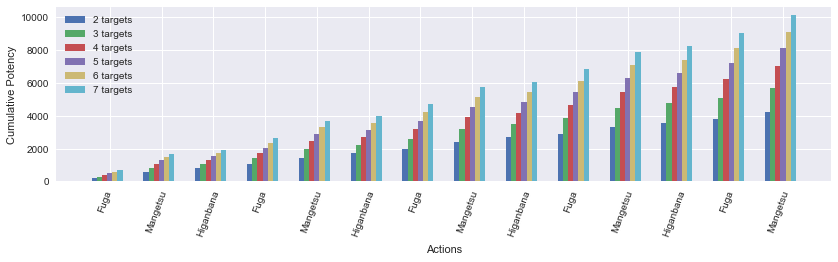

In [134]:
compare_n_potencies(dfs_higanbana, labels)

In [135]:
dfs_no_higanbana = []
avg_no_higanbana = []
labels = []

n_target_range = range(2, 8)

for n_targets in n_target_range:
    sam = Samurai()
    
    actions = [('Fuga'), ('Mangetsu'), ('Fuga'), ('Mangetsu'),
               ('Fuga'), ('Mangetsu'), ('Fuga'), ('Mangetsu'),
               ('Fuga'), ('Mangetsu'), ('Fuga'), ('Mangetsu'),
               ('Fuga'), ('Mangetsu')]

    df_temp, average_potency = sam.parse_rotation(actions, n_targets=n_targets)
    dfs_no_higanbana.append(df_temp)
    avg_no_higanbana.append(average_potency)
    
    labels.append('%s targets' % n_targets)  

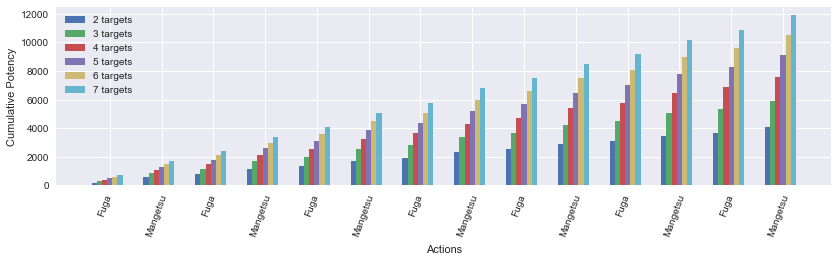

In [136]:
compare_n_potencies(dfs_no_higanbana, labels)

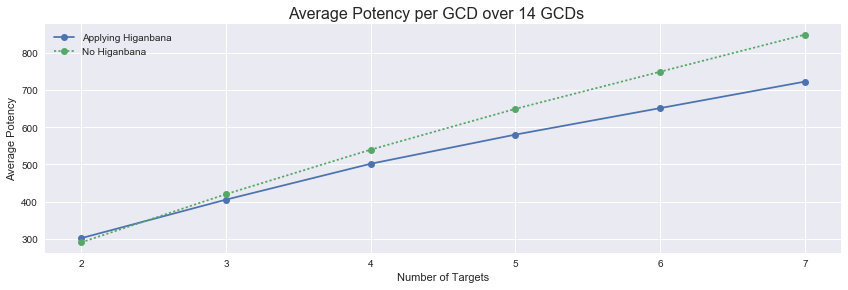

In [137]:
fig, axes = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(12,4))
fig.tight_layout(pad=2)

axes.plot(n_target_range, avg_higanbana, '-o', label='Applying Higanbana')
axes.plot(n_target_range, avg_no_higanbana, ':o', label='No Higanbana')
axes.set_ylabel('Average Potency')
axes.set_xlabel('Number of Targets')
axes.legend(loc='upper left', framealpha=0.5)

fig.suptitle('Average Potency per GCD over %s GCDs' % len(actions))

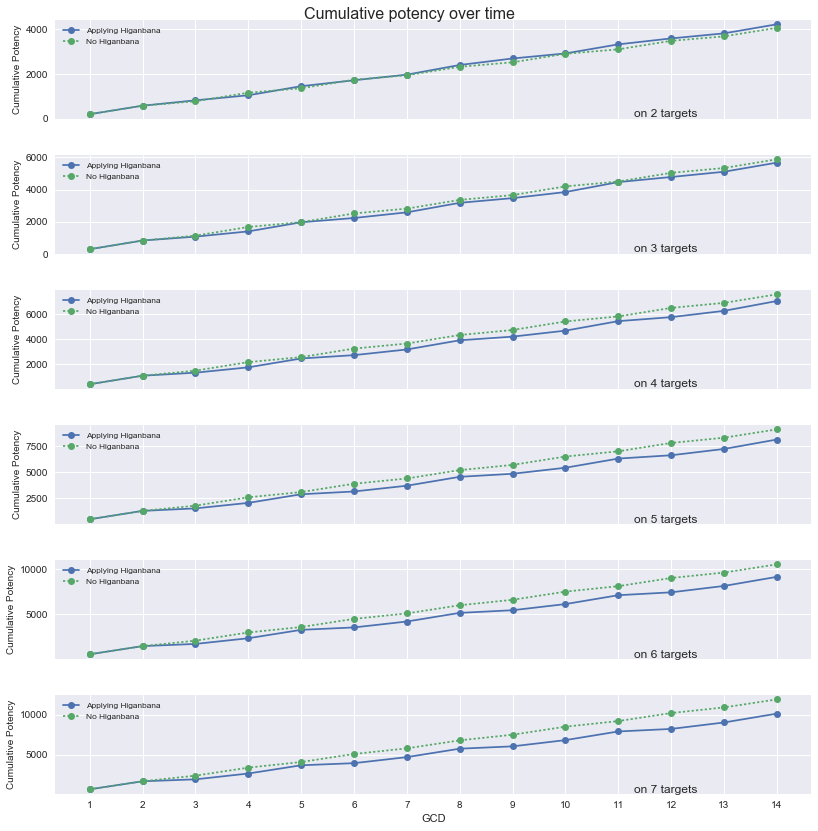

In [138]:
fig, axes = plt.subplots(nrows=len(dfs_higanbana), ncols=1, sharex=True, figsize=(12,12))
fig.tight_layout(pad=2)

for k, df in enumerate(dfs_higanbana): 
    ax = axes[k]
    
    xlocs = np.arange(len(dfs_higanbana[0]))+1
    ax.plot(xlocs, dfs_higanbana[k]['Total Potency'], '-o', label='Applying Higanbana')
    ax.plot(xlocs, dfs_no_higanbana[k]['Total Potency'], ':o', label='No Higanbana')

    ax.set_ylabel('Cumulative Potency', fontsize=10)
    axes[-1].set_xlabel('GCD')
    
    axes[-1].set_xticks(xlocs)
    ax.legend(loc='upper left', framealpha=0.5, prop={'size': 'small'})
    
    ax.text(len(dfs_buff[0])+0.5, 0.01, 'on %s targets' % n_target_range[k], ha='right', va='bottom', fontsize=12)

fig.suptitle('Cumulative potency over time')
fig.tight_layout(pad=3)

Since 3-4 is the typical pull size for leveling dungeons, it is likely optimal to not apply Higanbana to each mob at this level range. However, it is extremely close either way. One advantage for applying Higanbana would be TP relief from executing the AoE weaponskills. Should we buff with Jinpu and Shifu before executing this rotation?

In [139]:
sam = Samurai()

n_targets = 3

actions = [('Hakaze'), ('Shifu'), ('Hakaze'), ('Jinpu'),
           ('Fuga'), ('Mangetsu'), ('Higanbana'), ('Fuga'),
           ('Mangetsu'), ('Higanbana'), ('Fuga'), ('Mangetsu'),
           ('Higanbana'), ('Fuga'), ('Mangetsu')]

In [140]:
df4_buff, average_potency = sam.parse_rotation(actions, n_targets=n_targets)
display(df4_buff)
print 'average potency per GCD =', average_potency

,Weaponskill,Ability,Potency,Total Potency
0,Hakaze,,150.000000,150.000000
1,Shifu,,280.000000,430.000000
2,Hakaze,,166.500000,596.500000
3,Jinpu,,310.800000,907.300000
4,Fuga,,382.950000,1290.250000
5,Mangetsu,,689.310000,1979.560000
6,Higanbana,,306.360000,2285.920000
7,Fuga,,420.628025,2706.548025
8,Mangetsu,,726.988025,3433.536050
9,Higanbana,,344.038025,3777.574075


average potency per GCD = 445.372691667


In [141]:
sam = Samurai()

n_targets = 3

actions = [('Fuga'), ('Mangetsu'), ('Higanbana'), ('Fuga'),
           ('Mangetsu'), ('Higanbana'), ('Fuga'), ('Mangetsu'),
           ('Higanbana'), ('Fuga'), ('Mangetsu'), ('Fuga'),
           ('Mangetsu'), ('Fuga'), ('Mangetsu')]

In [142]:
df4_no_buff, average_potency = sam.parse_rotation(actions, n_targets=n_targets)
display(df4_no_buff)
print 'average potency per GCD =', average_potency

,Weaponskill,Ability,Potency,Total Potency
0,Fuga,,300.000000,300.000000
1,Mangetsu,,540.000000,840.000000
2,Higanbana,,240.000000,1080.000000
3,Fuga,,325.666667,1405.666667
4,Mangetsu,,565.666667,1971.333333
5,Higanbana,,265.666667,2237.000000
6,Fuga,,351.333333,2588.333333
7,Mangetsu,,591.333333,3179.666667
8,Higanbana,,291.333333,3471.000000
9,Fuga,,377.000000,3848.000000


average potency per GCD = 430.2


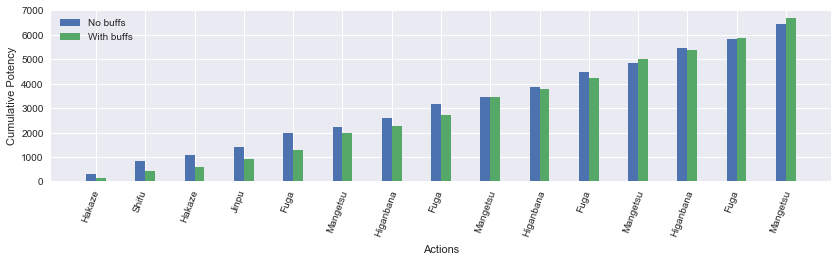

In [143]:
compare_potencies([df4_no_buff, df4_buff], ['No buffs', 'With buffs'])

It's very close. Ideally, you would shift to a single target rotation as mobs die, possibly letting you refresh buffs that carry over to the next pull. 

### Priority: Shifu > Jinpu
### Filler: Gekko combo > Higanbana
### AoE: Mangetsu combo + Higanbana, depending on group size and encounter duration

<hr width=75%>

## lvl 40-49

Level 40 introduces the Kasha combo finisher (combo from Shifu). Equal in potency to the Gekko finisher, this weaponskill opens the Ka Sen. This leads to a maximum of two Sen open and also unlocks the use of the Iaijutsu Tenka Goken. This powerful, AoE weaponskill scales its potency depending on the number of targets from 180 potency up to a maximum of 360 potency for the first target hit. In AoE situations, this is likely Iaijutsu of choice due to its instantaneous damage. Unfortunately, you do not get the AoE weaponskill to open Ka until level 45. For single target, do we still want to try our shiny new Iaijutsu?

In [144]:
sam = Samurai()

n_targets = 1

actions = [('Hakaze'), ('Shifu'), ('Kasha'), ('Higanbana'),
           ('Hakaze'), ('Jinpu'), ('Gekko'), ('Hakaze'),
           ('Shifu'), ('Kasha'), ('Tenka Goken'), ('Hakaze'),
           ('Jinpu'), ('Gekko'), ('Hakaze'), ('Shifu'),
           ('Kasha'), ('Tenka Goken')]

In [145]:
df5_tenka, average_potency = sam.parse_rotation(actions, n_targets=n_targets)
display(df5_tenka)
print 'average potency per GCD =', average_potency

,Weaponskill,Ability,Potency,Total Potency
0,Hakaze,,150.0000,150.0000
1,Shifu,,280.0000,430.0000
2,Kasha,,444.0000,874.0000
3,Higanbana,,266.4000,1140.4000
4,Hakaze,,194.9900,1335.3900
5,Jinpu,,343.5635,1678.9535
6,Gekko,,543.3635,2222.3170
7,Hakaze,,224.2385,2446.5555
8,Shifu,,390.1835,2836.7390
9,Kasha,,543.3635,3380.1025


average potency per GCD = 371.126694444


In [146]:
sam = Samurai()

n_targets = 1

actions = [('Hakaze'), ('Shifu'), ('Kasha'), ('Higanbana'),
           ('Hakaze'), ('Jinpu'), ('Gekko'), ('Higanbana'),
           ('Hakaze'), ('Shifu'), ('Kasha'), ('Higanbana'),
           ('Hakaze'), ('Jinpu'), ('Gekko'), ('Higanbana'),
           ('Hakaze'), ('Shifu')]

In [147]:
df5_no_tenka, average_potency = sam.parse_rotation(actions, n_targets=n_targets)
display(df5_no_tenka)
print 'average potency per GCD =', average_potency

,Weaponskill,Ability,Potency,Total Potency
0,Hakaze,,150.000000,150.000000
1,Shifu,,280.000000,430.000000
2,Kasha,,444.000000,874.000000
3,Higanbana,,266.400000,1140.400000
4,Hakaze,,194.990000,1335.390000
5,Jinpu,,343.563500,1678.953500
6,Gekko,,543.363500,2222.317000
7,Higanbana,,339.123500,2561.440500
8,Hakaze,,229.153025,2790.593525
9,Shifu,,395.098025,3185.691550


average potency per GCD = 345.490319444


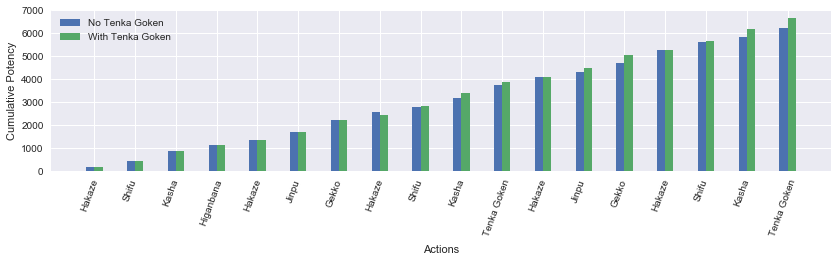

In [148]:
compare_potencies([df5_no_tenka, df5_tenka], ['No Tenka Goken', 'With Tenka Goken'])

It's surprisingly close! I would favor using Tenka Goken since it's fresh though.

<hr width=75%>

With the addition of a second third-level combo finisher plus Tenka Goken, do we want to move away from the AoE weaponskill rotation in favor of a single target one for the standard three mob pull?

In [149]:
sam = Samurai()

n_targets = 3

actions = [('Hakaze'), ('Shifu'), ('Kasha'), ('Higanbana'),
           ('Hakaze'), ('Jinpu'), ('Gekko'), ('Higanbana'),
           ('Hakaze'), ('Shifu'), ('Kasha'), ('Hakaze'),
           ('Jinpu'), ('Gekko'), ('Tenka Goken')]

In [150]:
df6_higanbana, average_potency = sam.parse_rotation(actions, n_targets=n_targets)
display(df6_higanbana)
print 'average potency per GCD =', average_potency

,Weaponskill,Ability,Potency,Total Potency
0,Hakaze,,150.000000,150.000000
1,Shifu,,280.000000,430.000000
2,Kasha,,444.000000,874.000000
3,Higanbana,,266.400000,1140.400000
4,Hakaze,,194.990000,1335.390000
5,Jinpu,,343.563500,1678.953500
6,Gekko,,543.363500,2222.317000
7,Higanbana,,339.123500,2561.440500
8,Hakaze,,261.916525,2823.357025
9,Shifu,,427.861525,3251.218550


average potency per GCD = 427.618611667


In [151]:
sam = Samurai()

n_targets = 3

actions = [('Hakaze'), ('Shifu'), ('Kasha'), ('Hakaze'),
           ('Jinpu'), ('Gekko'), ('Tenka Goken'), ('Hakaze'),
           ('Shifu'), ('Kasha'), ('Hakaze'), ('Jinpu'),
           ('Gekko'), ('Tenka Goken'), ('Hakaze')]

In [152]:
df6_tenka_only, average_potency = sam.parse_rotation(actions, n_targets=n_targets)
display(df6_tenka_only)
print 'average potency per GCD =', average_potency

,Weaponskill,Ability,Potency,Total Potency
0,Hakaze,,150.000,150.000
1,Shifu,,280.000,430.000
2,Kasha,,444.000,874.000
3,Hakaze,,166.500,1040.500
4,Jinpu,,310.800,1351.300
5,Gekko,,510.600,1861.900
6,Tenka Goken,,1240.758,3102.658
7,Hakaze,,191.475,3294.133
8,Shifu,,357.420,3651.553
9,Kasha,,510.600,4162.153


average potency per GCD = 443.592066667


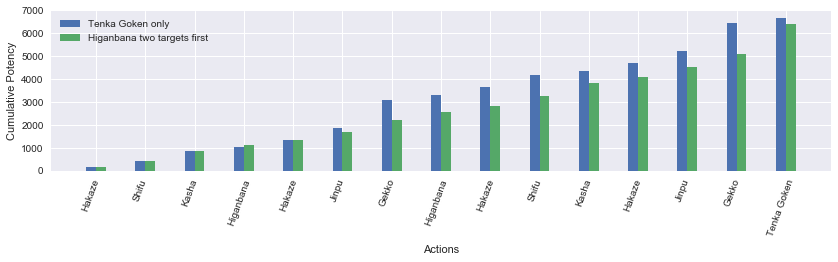

In [153]:
compare_potencies([df6_tenka_only, df6_higanbana], ['Tenka Goken only', 'Higanbana two targets first'])

Although close, both of these rotation potencies are inferior compared to the previous AoE rotations, even they were without Tenka Goken. However, we can open Getsu using the Mangetsu combo and open Ka using the Kasha combo. Maybe that works better?

In [154]:
sam = Samurai()

n_targets = 3

actions = [('Hakaze'), ('Shifu'), ('Kasha'), ('Higanbana'),
           ('Fuga'), ('Mangetsu'), ('Higanbana'), ('Hakaze'),
           ('Shifu'), ('Kasha'), ('Fuga'), ('Mangetsu'),
           ('Tenka Goken'), ('Fuga'), ('Mangetsu'),
           ('Hakaze'), ('Shifu'), ('Kasha'), ('Tenka Goken')]

In [155]:
df6_aoe_higanbana2, average_potency = sam.parse_rotation(actions, n_targets=n_targets)
display(df6_aoe_higanbana2)
print 'average potency per GCD =', average_potency

,Weaponskill,Ability,Potency,Total Potency
0,Hakaze,,150.00,150.00
1,Shifu,,280.00,430.00
2,Kasha,,444.00,874.00
3,Higanbana,,266.40,1140.40
4,Fuga,,361.49,1501.89
5,Mangetsu,,627.89,2129.78
6,Higanbana,,294.89,2424.67
7,Hakaze,,223.48,2648.15
8,Shifu,,367.78,3015.93
9,Kasha,,500.98,3516.91


average potency per GCD = 472.298421053


In [156]:
sam = Samurai()

n_targets = 3

actions = [('Hakaze'), ('Shifu'), ('Kasha'), ('Fuga'),
           ('Mangetsu'), ('Tenka Goken'), ('Hakaze'), ('Shifu'),
           ('Kasha'), ('Fuga'), ('Mangetsu'), ('Tenka Goken'),
           ('Hakaze'), ('Shifu'), ('Kasha'), ('Fuga'),
           ('Mangetsu'), ('Tenka Goken'), ('Hakaze')]

In [157]:
df6_aoe_tenka_only, average_potency = sam.parse_rotation(actions, n_targets=n_targets)
display(df6_aoe_tenka_only)
print 'average potency per GCD =', average_potency

,Weaponskill,Ability,Potency,Total Potency
0,Hakaze,,150.00,150.00
1,Shifu,,280.00,430.00
2,Kasha,,444.00,874.00
3,Fuga,,333.00,1207.00
4,Mangetsu,,599.40,1806.40
5,Tenka Goken,,1078.92,2885.32
6,Hakaze,,166.50,3051.82
7,Shifu,,310.80,3362.62
8,Kasha,,444.00,3806.62
9,Fuga,,333.00,4139.62


average potency per GCD = 469.318947368


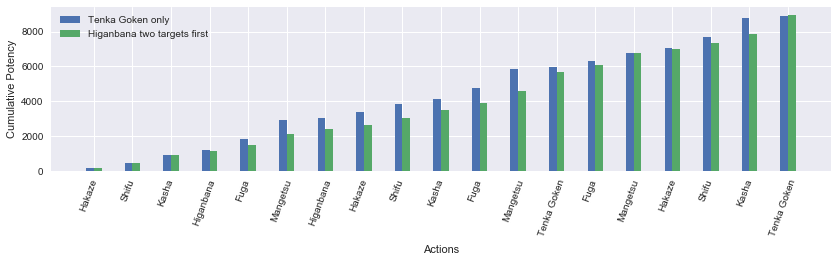

In [158]:
compare_potencies([df6_aoe_tenka_only, df6_aoe_higanbana2], ['Tenka Goken only', 'Higanbana two targets first'])

In terms of average potency per GCD, using Tenka Goken and using the Mangetsu combo to open Getsu wins out. Although the inclusion of the AoE weaponskills will scale better with larger pulls, TP sustainability is a concern. As the number of targets dwindles down to 3, it may be better to favor rotations with single target weaponskills.

<hr width=75%>

Thankfully, level 45 introduces the Oka AoE combo (combo from Fuga). This finisher is equal in potency to the Mangetsu finisher, but similarly to Kasha for single target, opens the Ka Sen instead. This opens the AoE rotation of alternating combos to open Ka and Getsu in order to use Tenka Goken. While this is definitely TP unfriendly, it should scale very well with mob size.

In [159]:
dfs_aoe2 = []
avg_aoe2 = []
labels = []

n_target_range = range(2, 8)

for n_targets in n_target_range:
    sam = Samurai()
    
    actions = [('Fuga'), ('Mangetsu'), ('Fuga'), ('Oka'),
               ('Tenka Goken'), ('Fuga'), ('Mangetsu'), ('Fuga'),
               ('Oka'), ('Tenka Goken'), ('Fuga'), ('Mangetsu'),
               ('Fuga'), ('Oka'), ('Tenka Goken')]

    df_temp, average_potency = sam.parse_rotation(actions, n_targets=n_targets)
    dfs_aoe2.append(df_temp)
    avg_aoe2.append(average_potency)
    
    labels.append('%s targets' % n_targets)

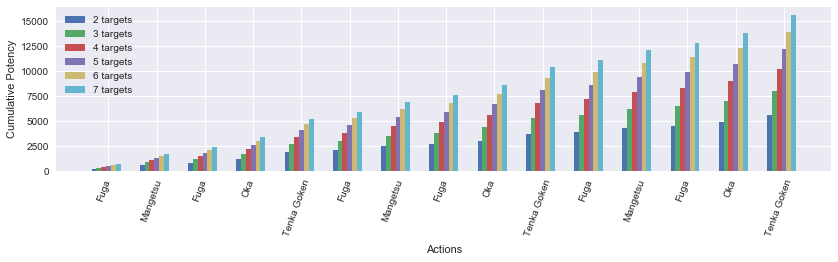

In [160]:
compare_n_potencies(dfs_aoe2, labels)

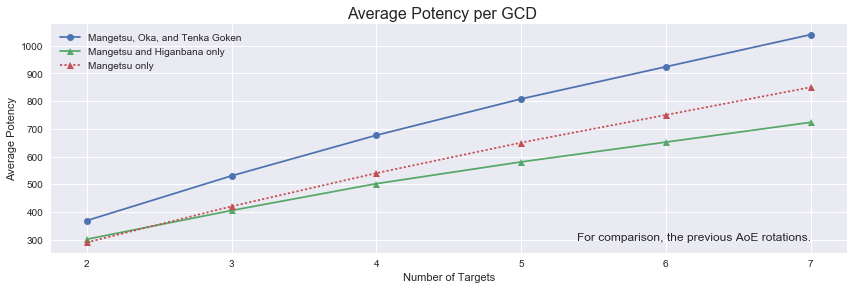

In [161]:
fig, axes = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(12,4))
fig.tight_layout(pad=2)

axes.plot(n_target_range, avg_aoe2, '-o', label='Mangetsu, Oka, and Tenka Goken')
axes.plot(n_target_range, avg_higanbana, '-^', label='Mangetsu and Higanbana only')
axes.plot(n_target_range, avg_no_higanbana, ':^', label='Mangetsu only')
axes.set_ylabel('Average Potency')
axes.set_xlabel('Number of Targets')
axes.legend(loc='upper left', framealpha=0.5)
axes.text(n_target_range[-1], min(avg_no_higanbana), 'For comparison, the previous AoE rotations.', ha='right', va='bottom', fontsize=12)

fig.suptitle('Average Potency per GCD')

At 3 targets, the potency of a full duration Higanbana is comparable to Tenka Goken, so applying Higanbana to some targets has merit (especially due to its 1 Sen cost). However, the AoE-centric rotation scales exceptionally well as pull size passes 3. The ability to open up Getsu and Ka with only four GCDs allowing for more frequent Tenka Goken casts facilitates that.

### Priority: Shifu > Jinpu and Higanbana > Tenka Goken

### Filler: Alternate Kasha and Gekko combos to maintain buffs and enable Tenka Goken

### AoE: Mangetsu combo, Oka combo if available, otherwise Kasha combo. For packs of 3, apply Higanbana to 1-2 sturdy targets before building for Tenka Goken. For larger packs, use Tenka Goken only. Shift to single target weaponskills if TP is scarce but prioritize Iaijutsu as described.